In [66]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime
import time
from datetime import datetime
import csv
%matplotlib inline
import matplotlib.pyplot as plt


In [136]:
# create dataframe from csv
path = "/Users/louis/Documents/DataScience/Titanic challenge/train.csv"
data = pd.read_csv(path)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Descriptive analysis

In [17]:
# nombre de passagers (training data)
data['PassengerId'].max()
# nombre de classes
data['Pclass'].max()
# GENDER
data['Sex'].value_counts(dropna = False)
# age
data['Age'].max()
# fare
print data['Fare'].max()
print data['Fare'].min()
# embarked
data['Embarked'].value_counts()

512.3292
0.0


S    644
C    168
Q     77
Name: Embarked, dtype: int64

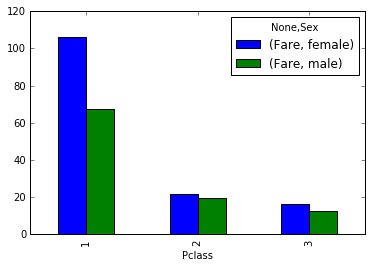

In [47]:
# fare paid by subcategory
pivot_fare = pd.pivot_table(data, index = ['Pclass'], values = ['Fare'], columns = ['Sex'], aggfunc = np.mean)
#pivot_fare.reset_index(level = [1], drop = False, inplace = True)
pivot_fare.plot.bar()

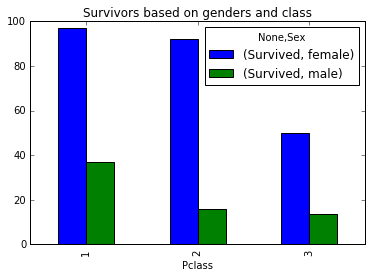

In [687]:
# % of survivors by subcategories
# number of persons by subcategory
pivot_all = pd.pivot_table(data, index = ['Pclass'], values = ['Survived'], columns = ['Sex'], aggfunc = 'count')
#number of survivors per category
pivot_survivors = pd.pivot_table(data, index = ['Pclass'], values = ['Survived'], columns = ['Sex'], aggfunc = 'sum')
# div
table = pivot_survivors.div(pivot_all)*100
# plot 
table.plot(kind ='bar', title =  'Survivors based on genders and class')

# reset indexes
#pivot_survivors.reset_index(level = [0,1], drop = False, inplace = True)
#pivot_all.reset_index(level = [0,1], drop = False, inplace = True)

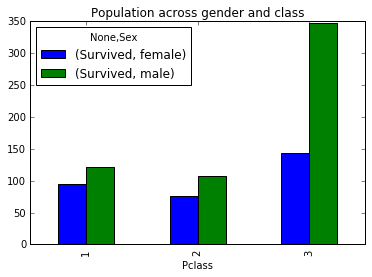

In [688]:
# distribution des gens selon les classes et le genre
pivot_all = pd.pivot_table(data, index = ['Pclass'], values = ['Survived'], columns = ['Sex'], aggfunc = 'count')
pivot_all.plot(kind = 'bar', title = 'Population across gender and class')

In [759]:
# distribution of death based on age
data['Age'] = data['Age'].fillna(data['Age'].mean())
pivot_age = pd.pivot_table(data, index = ['Age'], values = ['Survived'], aggfunc = 'sum')
tot = data.shape[0]
#pivot_plot = pivot_age.div(tot)
#pivot_plot.plot(kind = 'density', title = "Distribution of death records based on age")
#print 'the distribution is not stable, we need to create buckets'

In [737]:
#data['Survived'].value_counts(dropna = False)
#data['Survived'].sum()
data['Age'].value_counts(dropna = True).sum()

891

In [760]:
# Distribution of death based on fare
pivot_fare = pd.pivot_table(data, index = ['Fare'], values = ['Survived'], aggfunc = 'sum')
pivot_fare['Survived'].sum()
pivot_fare = pivot_fare.div(tot)*100
#pivot_fare.plot(kind = 'density', title = 'distribution of death based on fare')

In [575]:
cut_age = pd.cut(pivot_age, bins = 30, right = True)

# Pre-processing 

In [280]:
# create train dataframe
path_train = "/Users/louis/Documents/DataScience/Titanic challenge/train.csv"
data_train = pd.read_csv(path_train)
# create test dataframe
path_test = "/Users/louis/Documents/DataScience/Titanic challenge/test.csv"
data_test = pd.read_csv(path_test)

In [286]:
def preprocessing_model(data, features):
    # dummify embarked
    data = dummify(data, 'Embarked')
    
    ## Replace NAs in Age and Fare
    avg_age = data['Age'].mean()
    data['Age'] = data['Age'].fillna(avg_age)
    avg_fare = data['Fare'].mean()
    data['Fare'] = data['Fare'].fillna(avg_age)
    
    # 1 for women, 0 for men
    sex = {'male': 0, 'female':1}
    data['Sex'] = data['Sex'].map(sex)
    
    # keep only relevant features
    data = data[features]
    return data


# dummify Pclass and Embark
def dummify(data, column):
    data_column = data[column]
    dumm = pd.get_dummies(data_column, prefix = column, prefix_sep = '_')
    data = data.merge(dumm, left_index = True, right_index = True, how ='left')
    del data[column]
    return data


# K-Means

In [109]:
# Note: KMeans can fall in local minima, hence should be run several times manually (not a parameter in sklearn)
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt 

In [110]:
# replace null ages by the average of ages
av_ages = data['Age'].mean()
data['Age'] = data['Age'].fillna(av_ages)
print data['Age'].isnull().sum()

0


In [112]:
# select relevant features for KMeans
features_K = ['Age', 'Fare', 'Survived', 'SibSp', 'Parch']
data_K = data[features_K]
# Instantiate the model
model = KMeans(n_clusters = 3)

In [113]:
# center and normalize
data_norm = scale(data_K)
model = model.fit(data_norm)

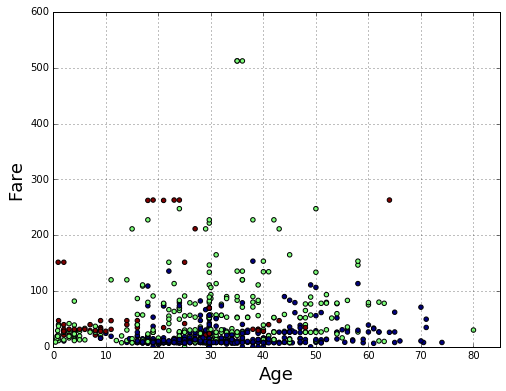

In [114]:
# And we'll visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(data_K.iloc[:,0], data_K.iloc[:,1], c=model.labels_.astype(float))
plt.xlabel('Age', fontsize=18)
plt.ylabel('Fare', fontsize = 18)
plt.ylim((0,600))
plt.xlim((0,85))
plt.grid(True)
plt.show()

In [448]:
# Try out different values of clusters and choose based on the sum of distances to the centroids
from sklearn import grid_search

# Instantiate the model
model_KM = KMeans()
# define parameters
parameters = {'n_clusters': [i for i in range(1,20)]}
clf = grid_search.GridSearchCV(model_KM, parameters, cv = 3)
clf.fit(data_norm)

GridSearchCV(cv=3, error_score='raise',
       estimator=KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_clusters': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [449]:
clf.best_params_

{'n_clusters': 19}

In [457]:
# Instantiate model with 3 clusters and train
model_KM_b = KMeans(n_clusters = 3)
model_KM_b.fit(data_norm)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [506]:
# get np.array with cluster labels
labels = model_KM_b.labels_
# get np.array with distances to centroids
distances = model_KM_b.transform(data_norm)

In [450]:
# KMeans
# ---> PARAMETERS
# n_clusters: number of clusters to form
# max_iter: Maximum number of iterations of the k-means algorithm for a single run.
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
# init : {‘k-means++’, ‘random’ or an ndarray} - ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.
#-random’: choose k observations (rows) at random from data for the initial centroids.
# random_state : seed of the random generator used to initizalize the centroids
# ---> ATTRIBUTES
#model.cluster_centers_
#model.labels_ : returns the label of each point
#model.inertia_ :Sum of distances of samples to their closest cluster center.
#model.transform(X,y): returns the distance to centroids of each points - hence allows to calculate the average distance to the centroids for each cluster
# (and compare which cluster has the highest sum of distances)

# PCA

In [290]:
from sklearn.decomposition import PCA
from sklearn.decomposition import RandomizedPCA

In [526]:
# PARAMETERS AND METHODS FOR PCA
# ---> PARAMETERS
# n_components : number of eigenvectors to keep
# copy: if true, fit(X).transform(X) will overwrite x - if false, it won't, you can use fit_transform(X) instead
# whiten: if true, the eigen vectors are divided by (n_samples*valeur propre) - hence even out the differences in variance across eigen vectors
# ---> ATTRIBUTES
# components_: Principal axes in feature space, representing the directions of maximum variance in the data.
# explained_variance_ratio_: Percentage of variance explained by each of the selected components.
# ---> Methods
# get_covariance() computes the covariance
#transform(X) applies the transformation to X

In [517]:
from sklearn import covariance

In [253]:
features_PCA = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
data_PCA = data[features_PCA]
data_PCA_scaled = scale(data_PCA)
print data_PCA

     Survived  Pclass  Sex        Age  SibSp  Parch      Fare  Embarked_C  \
0           0       3    0  22.000000      1      0    7.2500         0.0   
1           1       1    1  38.000000      1      0   71.2833         1.0   
2           1       3    1  26.000000      0      0    7.9250         0.0   
3           1       1    1  35.000000      1      0   53.1000         0.0   
4           0       3    0  35.000000      0      0    8.0500         0.0   
5           0       3    0  29.699118      0      0    8.4583         0.0   
6           0       1    0  54.000000      0      0   51.8625         0.0   
7           0       3    0   2.000000      3      1   21.0750         0.0   
8           1       3    1  27.000000      0      2   11.1333         0.0   
9           1       2    1  14.000000      1      0   30.0708         1.0   
10          1       3    1   4.000000      1      1   16.7000         0.0   
11          1       1    1  58.000000      0      0   26.5500         0.0   

In [525]:
# instantiate the covariance model
data_cov = data_PCA[['Survived', 'Fare', 'Pclass', 'Age']]
cov = covariance.EmpiricalCovariance(assume_centered = True)
cov.fit(data_cov)
cov.covariance_
# log likelihood of a Gaussian distribution to fit the dataset
cov.score(data_cov)

-12.691113234056406

In [541]:
# Instantiate model
pca = RandomizedPCA(n_components=10, whiten=True)

In [542]:
pca.fit(data_PCA_scaled)

RandomizedPCA(copy=True, iterated_power=3, n_components=10, random_state=None,
       whiten=True)

In [543]:
data_PCA.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [686]:
# return the coordinate of the nex axis on former axis
components = pca.components_

[[  2.61247988e-01  -2.67381799e-01   2.13084515e-01   5.45353101e-02
    1.58861496e-02   7.64618132e-02   2.81119807e-01   2.82718226e-01
   -2.12304811e-04  -2.50292419e-01]
 [  1.18367649e-01   7.51414365e-03   2.09412109e-01  -2.19762252e-01
    3.52060239e-01   3.79699401e-01   1.23631186e-01  -2.02824570e-01
   -1.84219324e-01   2.94173150e-01]
 [  1.79388226e-02   3.60256657e-01   1.43720030e-01  -3.23485459e-01
    1.69839835e-01   1.28159952e-01  -1.67240249e-01   1.01507254e-01
    4.00735107e-01  -3.37847584e-01]
 [ -4.67780801e-01   1.28167558e-02  -4.42468587e-01  -5.06448224e-02
    3.26844616e-01   2.09892447e-01   1.92705218e-01   3.69804519e-01
   -2.35383666e-01  -1.70457147e-01]
 [ -2.17414456e-01  -1.59444599e-01  -5.04988523e-02   5.32362971e-01
    2.68587752e-01   1.91311821e-01   2.63099586e-01  -3.81758807e-01
    5.95038950e-01  -4.43224479e-02]
 [  1.12933012e-01  -2.80773540e-01  -3.99812095e-01  -7.05953355e-01
    8.95572340e-02  -5.22584385e-01   5.28943

In [545]:
# check the norm of eigen vectors
from numpy import linalg as LA
for vector in components:
    print LA.norm(vector)

0.644845491836
0.742449572175
0.783376111415
0.909153744006
1.01901359037
1.21255334311
1.34406864769
1.55477272938
1.75098632789
13.9899937383


In [258]:
# returns the % of the variance explained by each vecto
explained_variance = pca.explained_variance_ratio_
print (pca.explained_variance_ratio_)

[ 0.24048537  0.18141203  0.16295187  0.12098328  0.09630305  0.068014
  0.05535503  0.04136816  0.03261628  0.00051093]


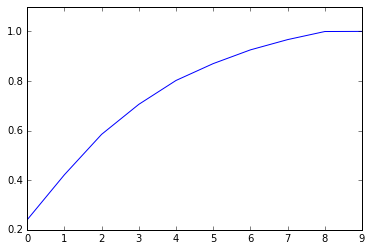

In [259]:
# plot the cumulated explained variance
cum_expl_variance = np.cumsum(explained_variance)
plt.plot(cum_expl_variance)

In [260]:
# transformer la donnée
data_transformed = pca.transform(data_PCA_scaled)

/Users/louis/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


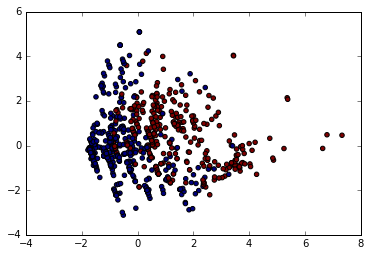

In [274]:
plt.scatter(data_transformed[:,0], data_transformed[:,1], c = data_PCA['Survived'])

# Logistic regression

In [306]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import metrics

In [429]:
# ---> PARAMETERS
#penalty:specifies the norm used in the penalization'l1' or 'l2'
#dual : dual=False when n_samples > n_features - choose between dual or primal formulation of the minimization problem
#C: inverse of lambda, penalizing parameter - samller values of C specify a stronger penalization
#fit_intercept: Theta0 is not null if True
# intercept_scaling: the weight given to the intercept
# class_weight : can be a dictionnary or 'balanced' - 'balanced' is by default n_samples / (n_classes * np.bincount(y))
# max_iter : maximum of iterations taken by the solver to converge
# random_state: the seed of the pseudo random generator used when shuffling the data
# solver : {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’}
# multi_class :{‘ovr’, ‘multinomial’} -> one versus rest (paralell boolen output) or multinomial (direct modelisation of more than 2 classes)
# ---> ATTRIBUTES
# coef_: coefficients of the regression
# intercept_: bias added to the decision function
# n_iter_: number of iterations performed - If binary or multinomial, it returns only 1 element. For liblinear solver, only the maximum number of iteration across all classes is given.

In [297]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
data_model = preprocessing_model(data_train, features)

In [298]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(data_model, data_train['Survived'], test_size=0.2, random_state=0)

In [427]:
# Instantiate the model
log_reg = linear_model.LogisticRegression(class_weight = {1: 0.4, 0:0.6})
# Train the model
log_reg.fit(X_train, y_train)
# Predict
y_train_predict = log_reg.predict(X_train)
y_test_predict = log_reg.predict(X_test)

In [428]:
# Test metrics
print '---------------Results on test-------------'
print 'F score %s' %metrics.f1_score(y_test, y_test_predict)
print 'Accuracy %s'%metrics.accuracy_score(y_test, y_test_predict)
print '---------------Results on training-----------'
print 'F score %s' %metrics.f1_score(y_train, y_train_predict)
print 'Accuracy %s'%metrics.accuracy_score(y_train, y_train_predict)

---------------Results on test-------------
F score 0.72131147541
Accuracy 0.810055865922
---------------Results on training-----------
F score 0.733606557377
Accuracy 0.817415730337


In [331]:
F_score = []
Accuracy = []

for i in range(1,20):
    # Instantiate the model
    log_reg = linear_model.LogisticRegression(C = i*0.1)
    # Train the model
    log_reg.fit(X_train, y_train)
    # Predict
    y_train_predict = log_reg.predict(X_train)
    y_test_predict = log_reg.predict(X_test)
    # Assess performance
    f = metrics.f1_score(y_test, y_test_predict)
    F_score.append(f)
    a = metrics.accuracy_score(y_train, y_train_predict)
    Accuracy.append(a)
                       
print F_score
print Accuracy

[0.71641791044776126, 0.71111111111111103, 0.71641791044776126, 0.72180451127819545, 0.71641791044776126, 0.72592592592592597, 0.73529411764705888, 0.73529411764705888, 0.73529411764705888, 0.73529411764705888, 0.74452554744525556, 0.74452554744525556, 0.74452554744525556, 0.74452554744525556, 0.74452554744525556, 0.74452554744525556, 0.74452554744525556, 0.74452554744525556, 0.74452554744525556]
[0.7991573033707865, 0.8019662921348315, 0.800561797752809, 0.8033707865168539, 0.8033707865168539, 0.8019662921348315, 0.7991573033707865, 0.7991573033707865, 0.7991573033707865, 0.7991573033707865, 0.7991573033707865, 0.797752808988764, 0.797752808988764, 0.797752808988764, 0.7991573033707865, 0.7991573033707865, 0.7991573033707865, 0.7991573033707865, 0.7991573033707865]


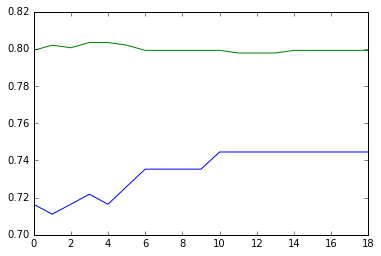

In [332]:
plt.plot(F_score)
plt.plot(Accuracy)


In [436]:
# ---> METHODS associated ti Logistic Regression
#log_reg.decision_function(X_train) : provides confidenc scores for all samples, The confidence score for a sample is the signed distance of that sample to the hyperplane.
#log_reg.predict_proba(X_train): returns the proba for each sample to belong to each of the class (2 if 2 classes, more if ovr or multiclass)
log_reg.score(X_train, y_train) # mean accuracy on the given test data and labels

0.81741573033707871

# Grid Search

In [551]:
from sklearn import grid_search
# GRID SEARCH
# By default, grid search optimizes on the accuracy_score for classification and r2_score for regression
# ---> PARAMETERS
# estimator: model used
# param_grid : list of parameters to test
# scoring: metric to optimize (accuracy_score and r2_score by default)
# fit_params: parameters  to pass to fit the method
# n_jobs: number of jobs to run in //
# cv : determines the cross-validation splitting strategy - Note: 3-fold cv, integer: specifies the # of folds, an object as a cross validation generator (see cross_validation doc)
# ---> ATTRIBUTES
#grid_scores_: returns a hash with parameters, mean_validation_score, and cv_validation_scores for each set of parameters
# best_estimator_: returns the best estimate
# best_params_: returns the best params 

In [337]:
# Instantiate the model
log_reg = linear_model.LogisticRegression()


In [343]:
parameters = {'C': [i*0.1 for i in range(1,20)], 'fit_intercept': [True, False]}
clf = grid_search.GridSearchCV(log_reg, parameters, cv = 3)

In [344]:
# Train the model
clf.fit(X_train, y_train)
# Predict
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

In [345]:
clf.best_params_

{'C': 0.1, 'fit_intercept': True}

In [346]:
# Test metrics
print '---------------Results on test-------------'
print 'F score %s' %metrics.f1_score(y_test, y_test_predict)
print 'Accuracy %s'%metrics.accuracy_score(y_test, y_test_predict)
print '---------------Results on training-----------'
print 'F score %s' %metrics.f1_score(y_train, y_train_predict)
print 'Accuracy %s'%metrics.accuracy_score(y_train, y_train_predict)

---------------Results on test-------------
F score 0.716417910448
Accuracy 0.787709497207
---------------Results on training-----------
F score 0.71905697446
Accuracy 0.799157303371


# Random trees

In [352]:
from sklearn import tree

In [363]:
# train test split allows to split the data set into training and test set
X_train, X_test, y_train, y_test = cross_validation.train_test_split(data_model, data_train['Survived'], test_size=0.2, random_state=0)

In [366]:
# define parameters
parameters = {'min_samples_split': [i*10 for i in range(1,100)]}
# instantiate model
decision_tree = tree.DecisionTreeClassifier()
# launch grid search
clf = grid_search.GridSearchCV(decision_tree, parameters, cv = 3)
clf.fit(X_train, y_train)
y_test_predict = clf.predict(X_test)
y_train_predict = clf.predict(X_train)

In [367]:
# Test metrics
print '---------------Results on test-------------'
print 'F score %s' %metrics.f1_score(y_test, y_test_predict)
print 'Accuracy %s'%metrics.accuracy_score(y_test, y_test_predict)
print '---------------Results on training-----------'
print 'F score %s' %metrics.f1_score(y_train, y_train_predict)
print 'Accuracy %s'%metrics.accuracy_score(y_train, y_train_predict)

---------------Results on test-------------
F score 0.717557251908
Accuracy 0.793296089385
---------------Results on training-----------
F score 0.781132075472
Accuracy 0.837078651685


In [550]:
# METRICS DOCS
#metrics.precision_recall_fscore_support(...): computes precision recall and fscore
metrics.precision_recall_fscore_support(y_test, y_test_predict)

(array([ 0.8015873 ,  0.83018868]),
 array([ 0.91818182,  0.63768116]),
 array([ 0.8559322 ,  0.72131148]),
 array([110,  69]))

In [368]:
clf.best_params_

{'min_samples_split': 60}

# Linear Regression (training)

In [380]:
from sklearn import linear_model

In [412]:
lin_reg = linear_model.LinearRegression(fit_intercept = True, normalize = True, copy_X = False, n_jobs = -1)
# ---> PARAMS
# fit_intercept : Theta0 = 0 if False (i.e., assume data is already centered) - careful with this one!
# normalize: Features are normalized upfront if True
# copy_X: makes a copy of features
# n_jobs: number of CPUs to use for the computation. If -1, all CPUs are used.
# ---> ATTRIBUTES
# coef_: returns the estimated coefficients for the linear regression model
# intercept_: returns Theta0

In [413]:
# Try to predict the age knowing the class and the Fare paid
features = ['Fare', 'Pclass', 'Age']
data_linreg = preprocessing_model(data, features)
X_reg = data_linreg[['Fare', 'Pclass']]
Y_reg = data_linreg['Age']

In [414]:
# train the model
# note: one can add the sample_weight - which corresponds to the weight of each line in the training of the model
lin_reg.fit(X_reg, Y_reg)

LinearRegression(copy_X=False, fit_intercept=True, n_jobs=-1, normalize=True)

In [415]:
# predict a Y based on a X
Y_pred = lin_reg.predict(X_reg)

In [416]:
# get params of the model
lin_reg.get_params(deep=True)

{'copy_X': False, 'fit_intercept': True, 'n_jobs': -1, 'normalize': True}

In [417]:
# get R-squared
lin_reg.score(X_reg, Y_reg)

0.12151957298981542

In [418]:
# get coefficients
print 'linear_coeff %s:' %lin_reg.coef_
print 'intercept %s:' %lin_reg.intercept_

linear_coeff [-0.03392305 -6.26070135]:
intercept 45.2453006578:


In [830]:
coeff = lin_reg.coef_
print coeff

[-0.03392305 -6.26070135]


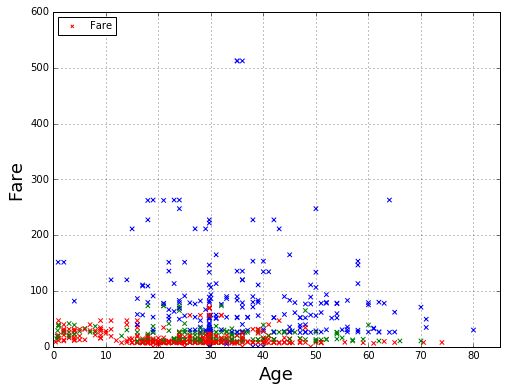

In [409]:
colors = {1: 'blue', 2:'green', 3:'red'}
plt.figure(figsize=(8, 6))
plt.scatter(Y_reg, X_reg['Fare'], c = X_reg['Pclass'].map(colors), marker = 'x')
plt.xlabel('Age', fontsize=18)
plt.ylabel('Fare', fontsize = 18)
plt.ylim((0,600))
plt.xlim((0,85))
plt.legend()
plt.legend(loc="upper left", markerscale=0.7, scatterpoints=1, fontsize=10)
plt.grid(True)

In [554]:
# Plot distribution of death on Age
pd.pivot_table(data, index = ["Age"])

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Scale

In [511]:
from sklearn import preprocessing
# scale allows to scale a dataset along any axis (1 if we normalize each sample, à if we normalize features)

In [514]:
data_norm = scale(data_K, with_mean = True, with_std = True, copy = False, axis = 0)
print data_norm.mean()

6.77846605383e-17


In [516]:
print data_norm.std()

1.0


# Support Vector Machine

In [581]:
from sklearn import svm

In [584]:
# Support vector machine doc
# --> Parameters
# C: penalty parameter
# kernel: 'linear', 'poly', 'rbf', 'sigmoid' - 'rbf' by default
# degree: degree of the polynomial kernel function (if poly)
# gamma: kernel coefficient for 'rbf', 'poly', and 'sigmoid' - if 'auto', 1/n will be used instead
# coef0: Independant term in kernel function
# probabiliy : boolean - whether to calculate the probabilities of the classifier or not
# class_weight: 'balanced' automatically adjust in function of class frequencies
# --> Attributes
# support_: indices of support vector
# support_vectors: returns support vectors
# n_support : number of support vectors for each class
# coef_: weight to each feature (only available in the case of linear kernel)
# intercept: constants in decision function
# --> Methods
#decision_function(X): distance of the samples X to the separating hyperplane
# get_params : get params for the estimator

In [591]:
# Try out different values of clusters and choose based on the sum of distances to the centroids
from sklearn import grid_search
# Instantiate the model
svc = svm.SVC()
# Define parameters
parameters = {'C': [i*0.1 for i in range(1,20)], 'kernel': ['linear', 'sigmoid']}
# instantiate the grid search
clf = grid_search.GridSearchCV(svc, parameters, cv = 3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'sigmoid'], 'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

# Cross Validation scores

In [595]:
from sklearn import cross_validation

In [ ]:
# DOC CROSS VALIDATION
# ---> Parameters
# estimator, X, y: model to use, features, target (no need to split into training and test)
# scoring: metrics used
# cv: # folds
# fit_params: parameters to pass to the fit method

In [593]:
svc = svm.SVC(C = 0.2, kernel = 'linear')

{'C': 0.2, 'kernel': 'linear'}

In [604]:
scores_f1 = cross_validation.cross_val_score(svc, data_model, data_train['Survived'], cv = 5, scoring = 'f1')
scores_accuracy = cross_validation.cross_val_score(svc, data_model, data_train['Survived'], cv = 5, scoring = 'accuracy')
print scores_f1
print scores_accuracy

[ 0.40944882  0.57575758  0.592       0.58181818  0.6031746 ]
[ 0.58100559  0.68715084  0.71348315  0.74157303  0.71751412]


# Neural network

In [606]:
import pybrain

In [607]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer

In [610]:
from sklearn import neural_network
from sklearn import linear_model

In [611]:
# Neural network doc
# ---> PARAMETERS
# hidden_layer_sizes: ith element represents the size of the ith hidden layer
# algorithm: ‘l-bfgs’ quasi-Newton - 'sgd': stochastic gradient descent - 'adam': similar to stochastic gradient descent
# alpha : L2 penalty
# batch_size : size of mini batches in gradient descent
# learning_rate: 'constant' : constant, given by learning_rate_init, 'invscaling': decreases the learning rate at each step, 'adaptive': keeps learning rate
# constant as long as training loss keeps decreasing
# shuffle: Whether to shuffle samples in each iteration. Only used when algorithm=’sgd’ or ‘adam’.
# learning_rate_init: The initial learning rate used.
# power_t : The exponent for inverse scaling learning rate. It is used in updating effective learning rate when the learning_rate is set to ‘invscaling’. Only used when algorithm=’sgd’.
# ---> ATTRIBUTES
# classes_: class label for each output
# loss: the current loss computer with the loss function (cost function)
# ---> METHODS
# predict_proba(X)

In [614]:
#net = neural_network.MLPClassifier(hidden_layer_size = (100,100), activation = 'logistic')


AttributeError: 'module' object has no attribute 'MLPClassifier'

In [637]:
# ------------------------------------ Simple perceptron
net = linear_model.Perceptron(alpha = 0.1, class_weight = 'balanced', fit_intercept = True)

In [642]:
net.fit(X_train, y_train)
y_train_predict = net.predict(X_train)
y_test_predict = net.predict(X_test)
print metrics.accuracy_score(y_train_predict, y_train)
print metrics.accuracy_score(y_test_predict, y_test)

0.74297752809
0.782122905028


In [644]:
from sklearn import neural_network

In [645]:
bern = neural_network.BernoulliRBM(n_components = 4)

In [646]:
y_train_predict = bern.predict(X_train)
y_test_predict = bern.predict(X_test)
print metrics.accuracy_score(y_train_predict, y_train)
print metrics.accuracy_score(y_test_predict, y_test)

AttributeError: 'BernoulliRBM' object has no attribute 'predict'

# K-Nearest neighbors

In [669]:
from sklearn import neighbors

In [670]:
# KN doc
# n_neighbors: Number of neighbors to use by default for k_neighbors queries.
# algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
# metric: by default ‘minkowski’, can use “euclidean”, “seuclidean”, etc...

In [678]:
K_N = neighbors.KNeighborsClassifier(metric = 'euclidean')

In [680]:
parameters = {'n_neighbors': [i for i in range(1,100)]}
kn = grid_search.GridSearchCV(K_N, parameters, cv = 5)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(data_model, data_train['Survived'], test_size=0.2, random_state=0)
kn.fit(X_train, y_train)
y_train_predict = kn.predict(X_train)
y_test_predict = kn.predict(X_test)
print metrics.accuracy_score(y_train_predict, y_train)
print metrics.accuracy_score(y_test_predict, y_test)
kn.best_params_

0.776685393258
0.72625698324


{'n_neighbors': 6}

In [ ]:
parameters = {'C': [i*0.1 for i in range(1,20)], 'kernel': ['linear', 'sigmoid']}
# instantiate the grid search
clf = grid_search.GridSearchCV(svc, parameters, cv = 3)
clf.fit(X_train, y_train)

# Seaborn

In [693]:
import seaborn as sns

In [695]:
# create dataframe from csv
path = "/Users/louis/Documents/DataScience/Titanic challenge/train.csv"
data = pd.read_csv(path)

{'axes.grid': 'False', 'ytick.color': 'blue'}

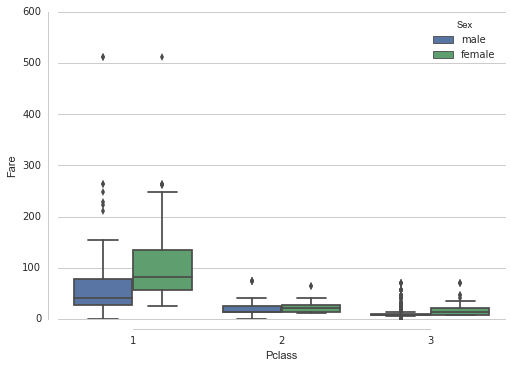

In [710]:
# Nested boxplot to display the fare in function of the class
sns.boxplot(x="Pclass", y="Fare", hue="Sex", data=data)
sns.set_style("whitegrid")
sns.despine(offset=10, trim=True)
# change axes style
sns.axes_style({'ytick.color' : 'blue', 'axes.grid' : 'False'})

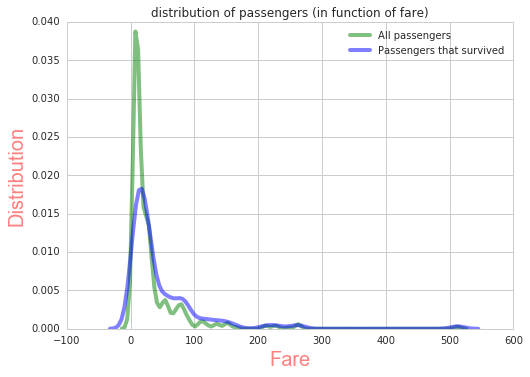

In [786]:
# Distribution of passengers in function of Fare
first_distr = sns.distplot(data['Fare'], kde = True, hist = False, kde_kws={"color":"g","lw":4,"label":"All passengers","alpha":0.5})
second_distr = sns.distplot(data[data['Survived'] == 1]['Fare'], hist = False, kde_kws = {"color":"b","lw":4,"label":"Passengers that survived","alpha":0.5})


sns.axes_style({'legend' : 'True', 'axes.grid' : 'False'})
first_distr.set_xlabel("Fare",size = 20,color="r",alpha=0.5)
first_distr.set_ylabel("Distribution",size = 20,color="r",alpha=0.5)
first_distr.set_title('distribution of passengers (in function of fare)')

(0.01, 0.059999999999999998)

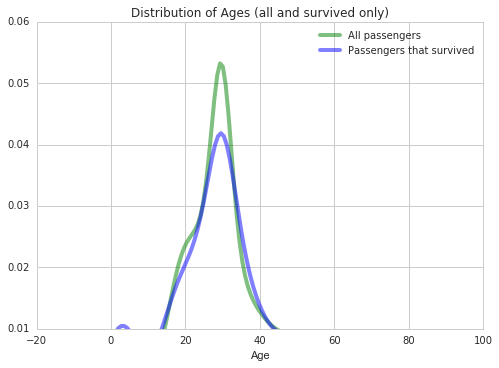

In [808]:
# Distribution of passengers in function of age
first_distr = sns.distplot(data['Age'], kde = True, hist = False, kde_kws={"color":"g","lw":4,"label":"All passengers","alpha":0.5})
second_distr = sns.distplot(data[data['Survived'] == 1]['Age'], hist = False, kde_kws = {"color":"b","lw":4,"label":"Passengers that survived","alpha":0.5})
first_distr.set_title('Distribution of Ages (all and survived only)')
first_distr.set_ylim(0.01,)

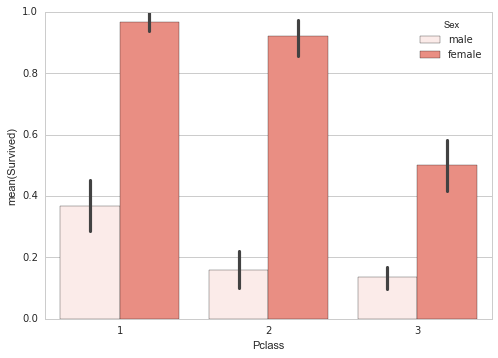

In [792]:
# Bar chart of survivors vs class
g = sns.barplot(y ='Survived', x = 'Pclass', hue = 'Sex', data = data, color = 'salmon')

{'axes.grid': True}

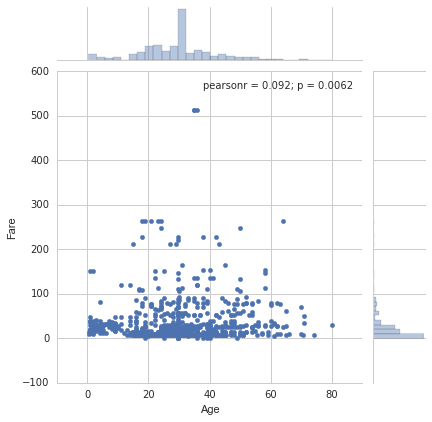

In [811]:
# Scatter plot age vs fare
g = sns.jointplot(x="Age", y="Fare", data=data)
sns.axes_style({'axes.grid': True})

{'axes.grid': 'False', 'ytick.color': 'blue'}

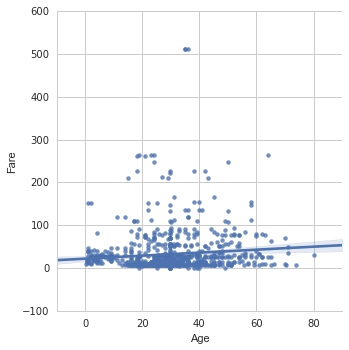

In [818]:
g = sns.lmplot('Age', 'Fare', data=data, fit_reg=True)
sns.axes_style({'ytick.color' : 'blue', 'axes.grid' : 'False'})

In [819]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


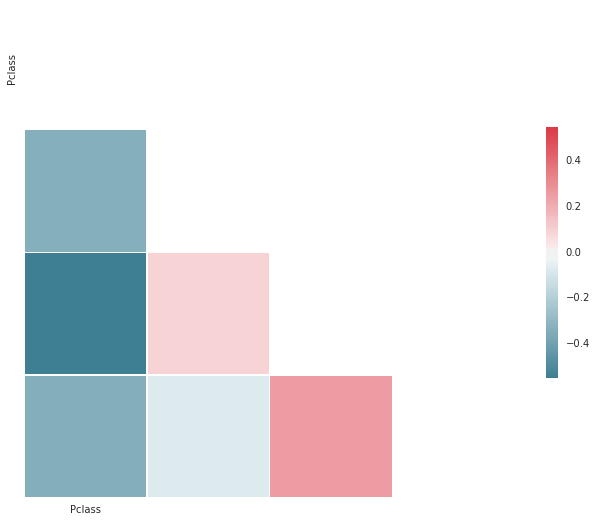

In [823]:
# Create a correlation matrix
data_corr = data[['Pclass', 'Age', 'Fare', "Survived"]]
corr = data_corr.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5})


In [824]:
print ax

Axes(0.125,0.133611;0.62x0.757778)


In [825]:
print f

Figure(880x720)


In [826]:
data_corr.columns.values

array(['Pclass', 'Age', 'Fare', 'Survived'], dtype=object)